# Importing Libraries

In [89]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind

# Reading Data

In [2]:
df = pd.read_csv("/Users/jxhn/Desktop/IRONHACK/tech_challenge/Jahn-technical_challenge_DA/data/measurements.csv")
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [29]:
df2 = pd.read_excel("/Users/jxhn/Desktop/IRONHACK/tech_challenge/Jahn-technical_challenge_DA/data/measurements2.xlsx")
df2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


## Exploring Data 

### CSV file

In [15]:
row, col = df.shape
print("This Dataset have",row,"rows and",col,"columns.")

This Dataset have 388 rows and 12 columns.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [7]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [17]:
print("Number of duplicate values : ",df.duplicated().sum())

Number of duplicate values :  0


### Excel file

In [30]:
row, col = df2.shape
print("This Dataset have",row,"rows and",col,"columns.")

This Dataset have 388 rows and 12 columns.


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [32]:
df2.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

## Conclusions 

- Both datasets have the same data. The data in excel format has better fitting data types for it's collumns when looking at the values in the columns, leading me to suggest it is easier to work with.
- Let's make sure on the next line:

In [34]:
df.merge(df2, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas,AC,refill liters,refill gas


- After dropping duplicates there is no data left when merging df and df2, which shows both files contain the same data.

## Data Cleaning

## Pep 8 column names

In [19]:
def clean_column_names(df):
    """
    Cleans column names of a DataFrame:
    - Converts column names to lowercase
    - Replaces spaces with underscores
    """
    df.columns = df.columns.str.lower()  # Convert to lowercase
    df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores

# Clean column names using the function
clean_column_names(df)

In [20]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


### Changing data types of columns to match corresponding values

In [24]:
df['distance'] = df['distance'].astype(str).str.replace(',', '.').astype(float)
df['consume'] = df['consume'].astype(str).str.replace(',', '.').astype(float)
df['temp_inside'] = df['temp_inside'].astype(str).str.replace(',', '.').astype(float)

In [25]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


### Let's look at null values again 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   ac             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill_liters  13 non-null     object 
 11  refill_gas     13 non-null     object 
dtypes: float64(3), int64(5), object(4)
memory usage: 36.5+ KB


In [39]:
df.isnull().sum()/len(df)*100

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       3.092784
temp_outside      0.000000
specials         76.030928
gas_type          0.000000
ac                0.000000
rain              0.000000
sun               0.000000
refill_liters    96.649485
refill_gas       96.649485
dtype: float64

- Columns "refill_liters" and "refill_gas" have over 96% null values! I will drop these two columns

In [41]:
# Create a copy of the original DataFrame
original_df = df.copy()

In [42]:
# Drop columns "refill_liters" and "refill_gas" from the DataFrame
df = df.drop(['refill_liters', 'refill_gas'], axis=1)

### Exploring Columns

In [43]:
df['specials'].value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

- Columns 'ac', 'rain' and 'sun' contain the same information as column 'specials' apart from 'snow' but that only 3 values so it makes sense to drop the 'specials' column as well.

In [44]:
# Drop columns "refill_liters" and "refill_gas" from the DataFrame
df = df.drop(['specials'], axis=1)

### Remainding null values

In [46]:
df.isnull().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
ac               0
rain             0
sun              0
dtype: int64

In [48]:
df['temp_inside'].value_counts()

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64

In [50]:
df['temp_inside'].isnull().sum()

12

### Will replace null values with mode

In [57]:
mode = df['temp_inside'].mode()
mode

0    21.5
Name: temp_inside, dtype: float64

In [58]:
df.temp_inside.fillna(mode[0], inplace=True)

In [59]:
df.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

### Adding new columns (features)

In [60]:
df['temp_diff'] = df.temp_inside - df.temp_outside

In [61]:
df['fuel_used'] = df.distance * df.consume/100

In [62]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,fuel_used
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084


# Current Petrol Prices 

## E10 = 1.85

## SP98 = 1.98

In [64]:
df['cost_of_trip'] = np.where(df.gas_type == 'E10', df.fuel_used*1.85, df.fuel_used*1.98).round(3)

In [65]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,fuel_used,cost_of_trip
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000,2.590
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040,0.932
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160,1.140
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031,0.931
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325,1.540


- Now we have a new column showing the total cost of the trip 

### Changing speed column to decimals of an hour

In [66]:
df['trip_in_hours'] = df.speed/60

In [67]:
df['avg_speed'] = df['distance']/df['trip_in_hours']

In [68]:
df = df.drop(['speed'], axis=1)

In [69]:
df.head()

,distance,consume,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,fuel_used,cost_of_trip,trip_in_hours,avg_speed
0,28.0,5.0,21.5,12,E10,0,0,0,9.5,1.4000,2.590,0.433333,64.615385
1,12.0,4.2,21.5,13,E10,0,0,0,8.5,0.5040,0.932,0.500000,24.000000
2,11.2,5.5,21.5,15,E10,0,0,0,6.5,0.6160,1.140,0.633333,17.684211
3,12.9,3.9,21.5,14,E10,0,0,0,7.5,0.5031,0.931,0.600000,21.500000
4,18.5,4.5,21.5,15,E10,0,0,0,6.5,0.8325,1.540,0.766667,24.130435


In [70]:
df.describe()

,distance,consume,temp_inside,temp_outside,ac,rain,sun,temp_diff,fuel_used,cost_of_trip,trip_in_hours,avg_speed
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,21.916237,11.358247,0.077320,0.123711,0.082474,10.557990,0.935294,1.797814,0.698797,26.642807
std,22.667837,1.033172,0.997449,6.991542,0.267443,0.329677,0.275441,6.700099,1.115967,2.164153,0.226642,18.681447
min,1.300000,3.300000,19.000000,-5.000000,0.000000,0.000000,0.000000,-8.000000,0.120000,0.222000,0.233333,3.714286
25%,11.800000,4.300000,21.500000,7.000000,0.000000,0.000000,0.000000,6.375000,0.551650,1.053250,0.545833,16.465116
50%,14.600000,4.700000,22.000000,10.000000,0.000000,0.000000,0.000000,11.500000,0.680600,1.305000,0.675000,22.000000
75%,19.000000,5.300000,22.500000,16.000000,0.000000,0.000000,0.000000,14.625000,0.916500,1.759750,0.833333,31.083333
max,216.100000,12.200000,25.500000,31.000000,1.000000,1.000000,1.000000,26.000000,11.453300,22.678000,1.500000,158.250000


### Saving my new cleaned DF

In [71]:
df.to_csv('/Users/jxhn/Desktop/IRONHACK/tech_challenge/Jahn-technical_challenge_DA/data/clean_df.csv', index=False)

#

# Data Visualisation

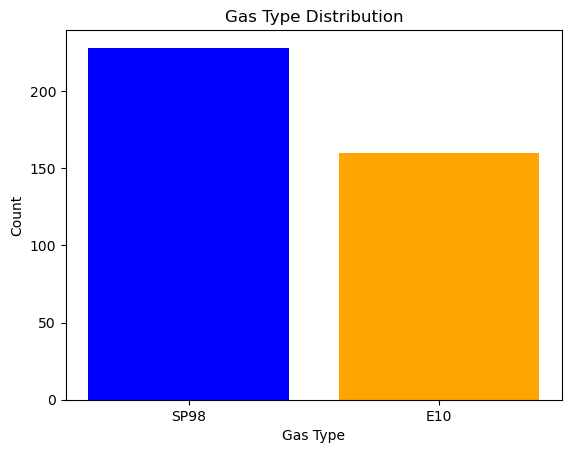

In [74]:
# Count the occurrences of each gas type
gas_type_counts = df['gas_type'].value_counts()

#Bar Colours
colors = ['blue', 'orange']

# Create a bar plot with custom colors
plt.bar(gas_type_counts.index, gas_type_counts.values, color=colors)
plt.xlabel('Gas Type')
plt.ylabel('Count')
plt.title('Gas Type Distribution')

# Show the plot
plt.show()

### We can clearly see more trips have been taken using fuel SP98

Creating new dataframes for numericals and categoricals

In [75]:
df_num = df.drop(['gas_type'], axis=1)

In [76]:
df_cat = df[['gas_type']]

### Checking out the distribution of data

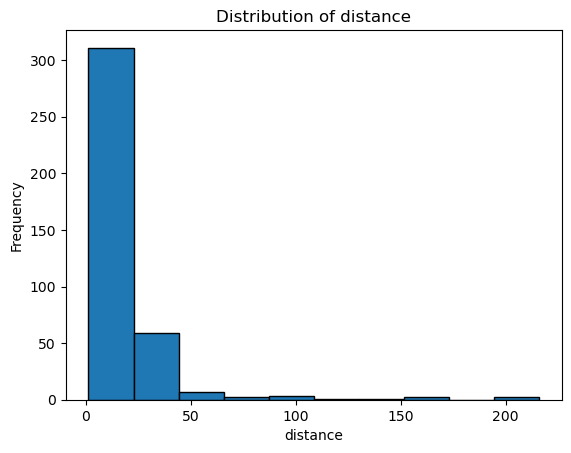

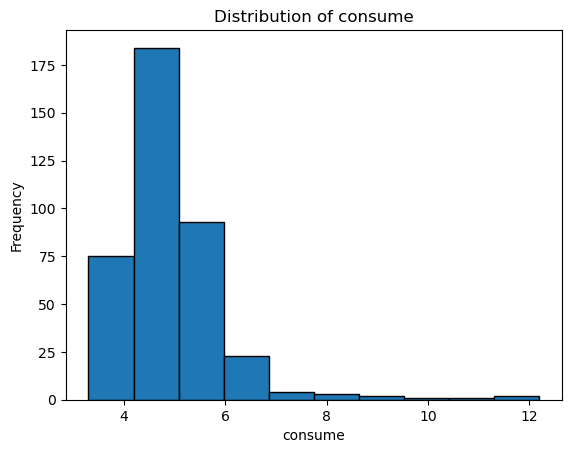

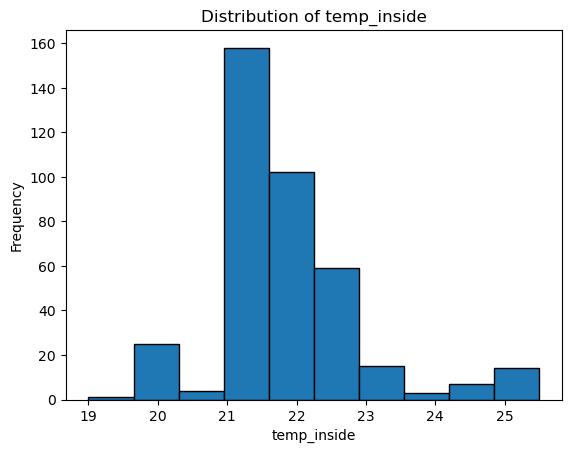

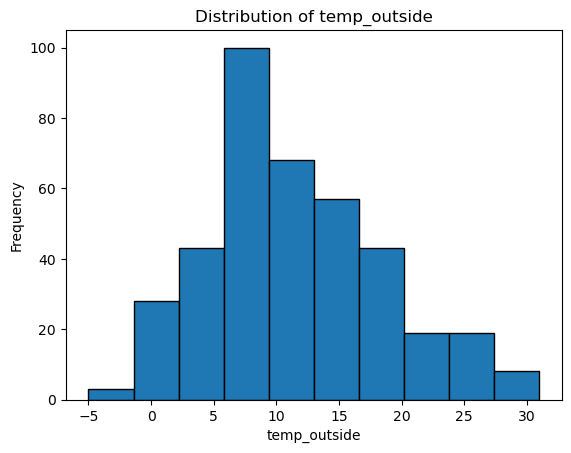

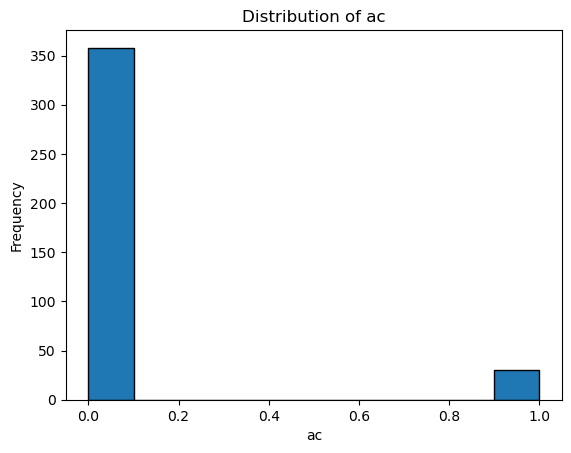

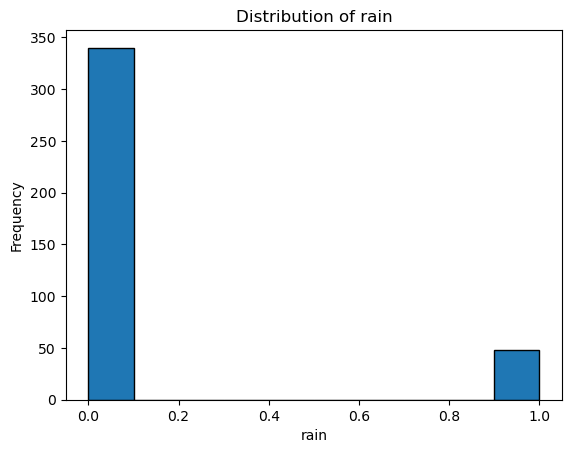

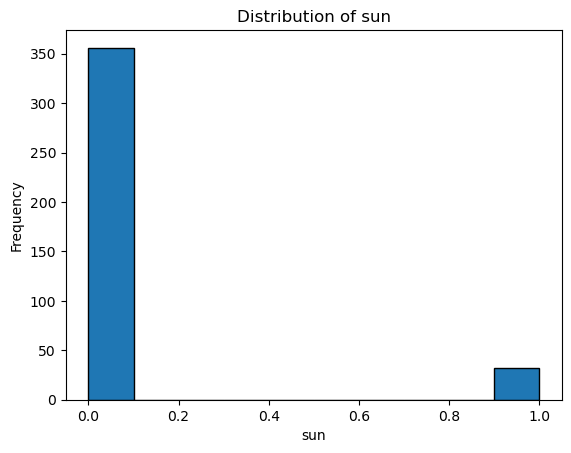

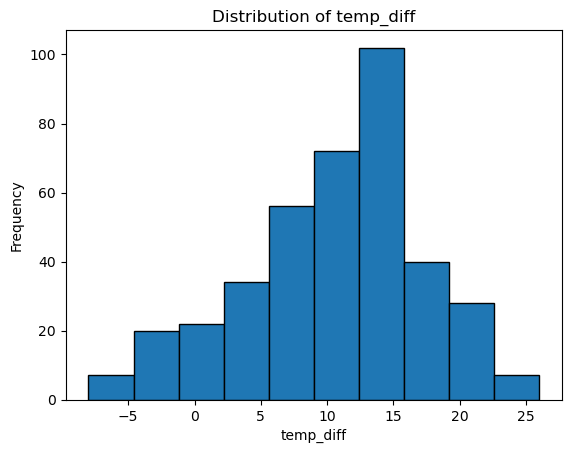

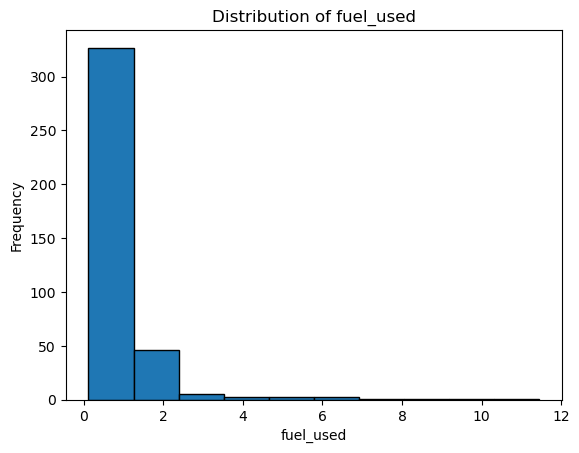

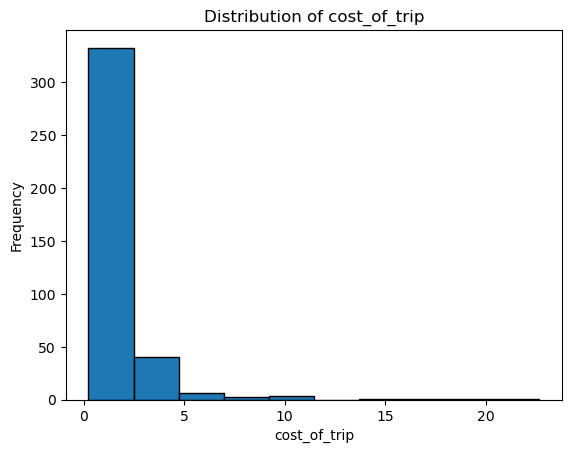

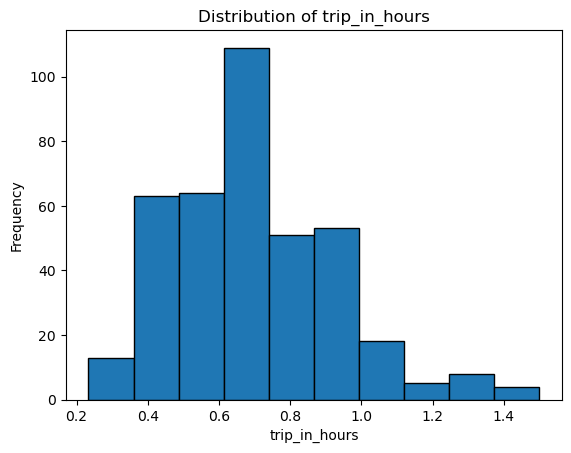

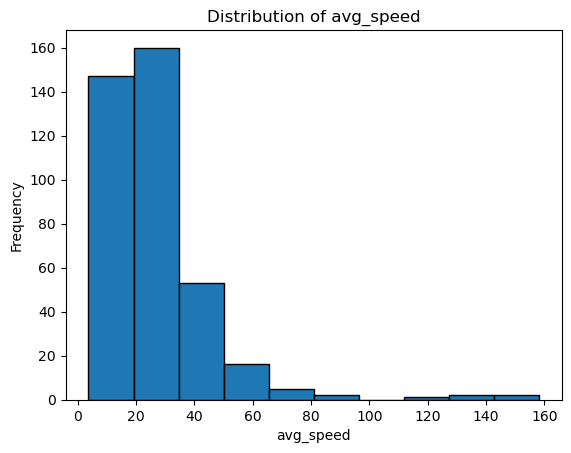

In [78]:
# Plot histograms for each column
for column in df_num.columns:
    plt.hist(df_num[column], bins=10, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

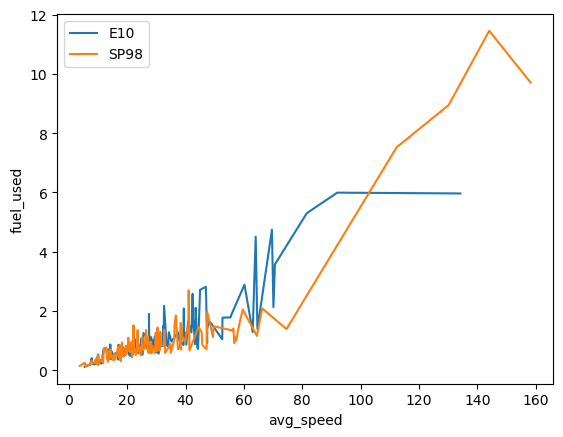

In [82]:
fig,ax = plt.subplots()
cole10 = df[df.gas_type =='E10']
colsp98 = df[df.gas_type =='SP98']

ax1 = sns.lineplot(data=cole10, x=cole10["avg_speed"],y=cole10["fuel_used"], label='E10')
ax2 = sns.lineplot(data=colsp98, x=colsp98["avg_speed"],y=colsp98["fuel_used"], label='SP98')
plt.legend(loc="upper left")
plt.show()

### SP98 uses considerably more fuel at higher speeds

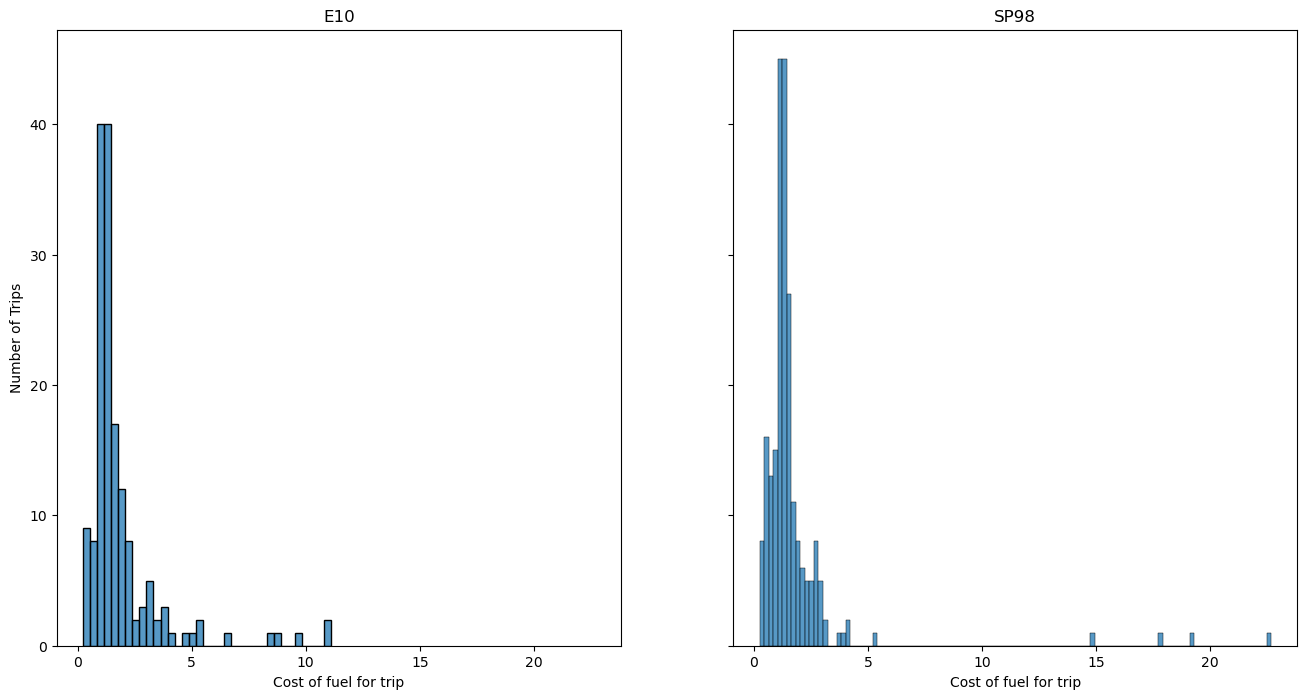

In [88]:
fig,axes = plt.subplots(1,2,figsize=(16,8), sharey=True, sharex=True)
cole10 = df[df.gas_type =='E10']
colsp98 = df[df.gas_type =='SP98']

sns.histplot(ax=axes[0], data=cole10,x=cole10["cost_of_trip"], label='E10').set(title = "E10")
axes[0].set(xlabel="Cost of fuel for trip",ylabel="Number of Trips")

sns.histplot(ax=axes[1], data=colsp98,x=colsp98["cost_of_trip"], label='SP98').set(title = "SP98")
axes[1].set(xlabel="Cost of fuel for trip",ylabel="Number of Trips")

plt.show()

### The above graph shows the cost of fuel per trip for each fuel type. Both graphs have the same distribution with fuel type SP98 being used for the 4 longest trips in the data

#

# Conclusions and insights

- When considering which fuel type to use for a trip the data suggests it is more economical to use E10 for longer trips as it will end up costing you less.
- For shorter trips there seems to only be a marginal difference.
- E10 fuel is cheaper than SP98 though it is used less. It would be worth checking the models of the cars in the data to give insight to why that may be. Some cars require the use of a certain type of petrol depending on which engine they have. In this case, suggesting a switch of fuel to save money wouldn't make sense if it's not possible. However, in the long run switching the fleet could prove to me more cost effective.


#

# Statistical Analysis

### The null hypothesis: the consumption of the two fuel types is the same

One sided ttest to determine if we accept or reject the null hypothesis 

In [90]:
stat,pval = ttest_ind(df[df.gas_type=='E10'].fuel_used,df[df.gas_type=='SP98'].fuel_used)
print("The P value is:", pval)
print("The stat value is:", stat)

The P value is: 0.27679289437741406
The stat value is: 1.089091767035112


#### The P value is over the threshold of 0.05 so we can accept our null hypothesis that both fuel types are consumed almost equally

#

### The second null hypothesis: regardless of fuel type the trip will cost the same

One sided ttest to determine if we accept or reject the null hypothesis 

In [91]:
stat,pval = ttest_ind(df[df.gas_type=='E10'].cost_of_trip,df[df.gas_type=='SP98'].cost_of_trip)
print("The P value is:", pval)
print("The stat value is:", stat)

The P value is: 0.6008285099670861
The stat value is: 0.5236413578565928


#### The P value is over the threshold of 0.05 so we can accept our null hypothesis that both fuel types end up costing around the same per trip

## Please bear in mind the historical and current price of fuels. Generally speaking SP98 is priced higher than E10